<a href="https://colab.research.google.com/github/ibrahimardic/Mouse-Operations-Using-Hand-Gestures/blob/main/Room_Occupancy_Count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Extracting**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
room_occupancy_estimation = fetch_ucirepo(id=864)

# data (as pandas dataframes)
X = room_occupancy_estimation.data.features
y = room_occupancy_estimation.data.targets

# metadata
print(room_occupancy_estimation.metadata)

# variable information
print(room_occupancy_estimation.variables)


{'uci_id': 864, 'name': 'Room Occupancy Estimation', 'repository_url': 'https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation', 'data_url': 'https://archive.ics.uci.edu/static/public/864/data.csv', 'abstract': 'Data set for estimating the precise number of occupants in a room using multiple non-intrusive environmental sensors like temperature, light, sound, CO2 and PIR.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10129, 'num_features': 18, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Room_Occupancy_Count'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Wed Aug 16 2023', 'dataset_doi': '10.24432/C5P605', 'creators': ['Adarsh Pal Singh', 'Sachin Chaudhari'], 'intro_paper': {'title': 'Machine Learning-Based Occupancy Estimation Using Multivariate Sensor Nodes', 'authors': 'A. Singh, Vivek Jain, 

# **Raw Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 19)

In [ ]:
df = pd.DataFrame(X)
df['Room_Occupancy_Count'] = y


In [ ]:
df

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
df["Room_Occupancy_Count"].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

# **Data Manipulation**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Avg_Temp'] = (df['S1_Temp'] + df['S2_Temp'] + df['S3_Temp'] + df['S4_Temp']) / 4
column_to_drop = ['S2_Temp','S3_Temp','S4_Temp']

df.drop(column_to_drop, axis=1, inplace = True)

In [ ]:
df

,Date,Time,S1_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Avg_Temp
0,2017-12-22,10:49:41,24.94,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,24.9075
1,2017-12-22,10:50:12,24.94,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,24.9225
2,2017-12-22,10:50:42,25.00,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,24.9225
3,2017-12-22,10:51:13,25.00,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,24.9375
4,2017-12-22,10:51:44,25.00,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,24.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018-01-11,08:58:07,25.06,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0,25.0475
10125,2018-01-11,08:58:37,25.06,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0,25.0150
10126,2018-01-11,08:59:08,25.13,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0,25.0325
10127,2018-01-11,08:59:39,25.13,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0,25.0325


In [ ]:
df['S1_Temp'] = df['Avg_Temp']
df.drop(columns = 'Avg_Temp', inplace = True)

In [ ]:
df.rename(columns = {'S1_Temp': 'Avg_Temp'}, inplace = True)
df

,Date,Time,Avg_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22,10:49:41,24.9075,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22,10:50:12,24.9225,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22,10:50:42,24.9225,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22,10:51:13,24.9375,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22,10:51:44,24.9375,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018-01-11,08:58:07,25.0475,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018-01-11,08:58:37,25.0150,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018-01-11,08:59:08,25.0325,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018-01-11,08:59:39,25.0325,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# **Visualation**

<ipython-input-41-194f459e4744>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Avg_Temp', y='Date', inner='box', palette='Dark2')


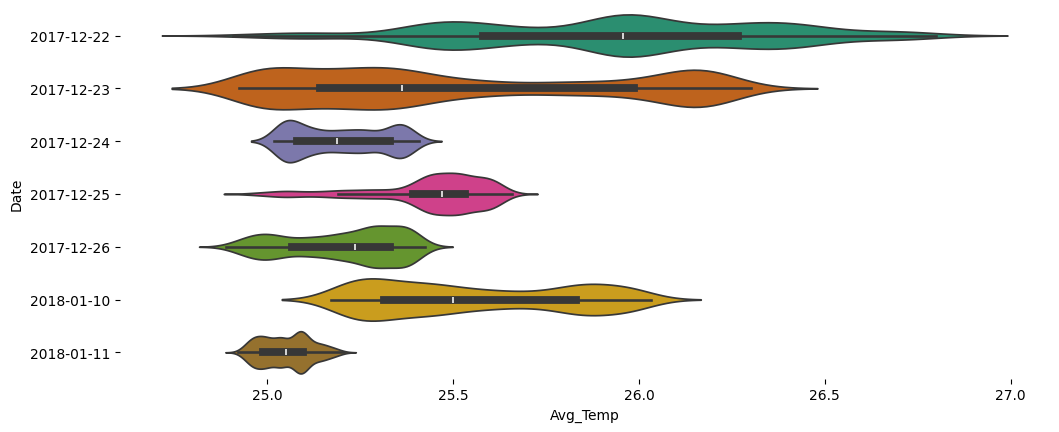

In [ ]:
X = df.drop(columns = {'Room_Occupancy_Count', 'Date', 'Time'}, axis=1)  # Select all columns except "Room_Occupancy_Count" and timeseries
y = df['Room_Occupancy_Count']  # Select the target column# @title Date and Avg_Temp


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Room_Occupancy_Count'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Avg_Temp', y='Date', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train_baseline, y_train_baseline)

y_pred_baseline = clf.predict(X_test)

accuracy_rfc = accuracy_score(y_test_baseline, y_pred_baseline)
print("Accuracy:", accuracy_rfc)

Accuracy: 0.9975320829220138


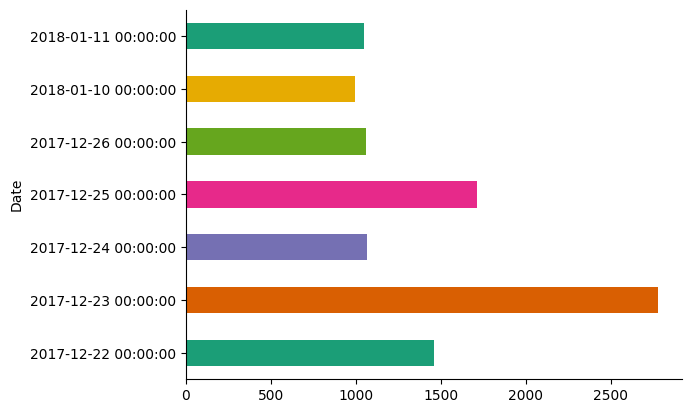

In [ ]:
# @title Date

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-17-1837be412ce7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square= True)


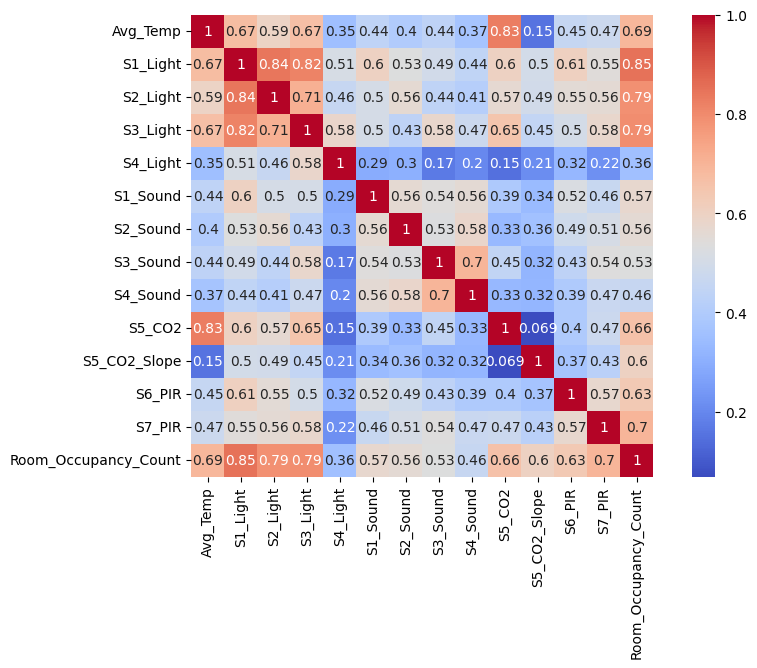

In [ ]:
# @title Heatmap visualation

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square= True)
plt.show()


In [ ]:
df

,Date,Time,Avg_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017-12-22,10:49:41,24.9075,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017-12-22,10:50:12,24.9225,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017-12-22,10:50:42,24.9225,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017-12-22,10:51:13,24.9375,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017-12-22,10:51:44,24.9375,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018-01-11,08:58:07,25.0475,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018-01-11,08:58:37,25.0150,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018-01-11,08:59:08,25.0325,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018-01-11,08:59:39,25.0325,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


# **Modeling**

In [ ]:
from sklearn import svm, neighbors, tree, ensemble, naive_bayes
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
X = df.drop(columns = {'Room_Occupancy_Count', 'Date', 'Time'}, axis=1)  # Select all columns except "Room_Occupancy_Count" and timeseries
y = df['Room_Occupancy_Count']  # Select the target column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

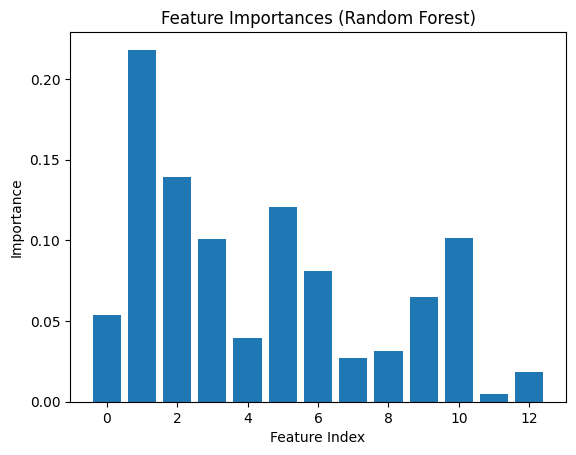

In [ ]:
# @title Feature Importances
importances = clf.feature_importances_

plt.bar(range(len(importances)), importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances (Random Forest)")
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rfc)

Accuracy: 0.998025666337611


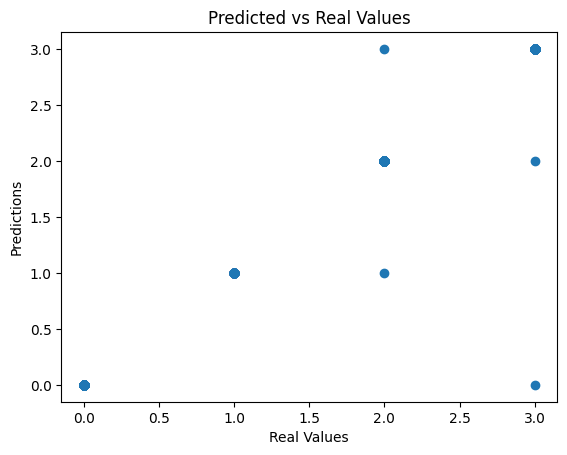

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Predictions")
plt.title("Predicted vs Real Values")
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.99      0.99      0.99       164
           3       0.99      0.99      0.99       140

    accuracy                           1.00      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       1.00      1.00      1.00      2026



## Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel = 'linear', random_state =42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy_svm)

Accuracy:  0.9911154985192497


In [ ]:
print("Classification report: ")
print(classification_report(y_test, y_pred_svm))

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1619
           1       0.99      1.00      1.00       103
           2       0.97      0.96      0.96       164
           3       0.94      0.94      0.94       140

    accuracy                           0.99      2026
   macro avg       0.97      0.97      0.97      2026
weighted avg       0.99      0.99      0.99      2026



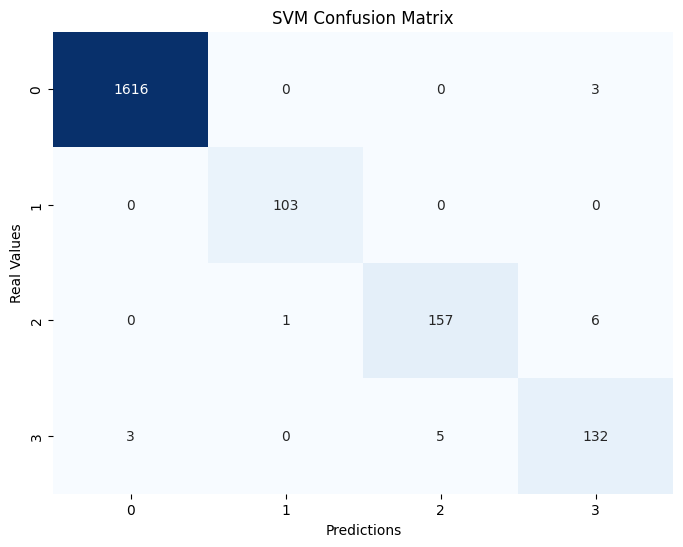

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.title('SVM Confusion Matrix')
plt.show()